In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [2]:
loan_data = pd.read_csv('loan_data_2007_2014.csv', low_memory = False)

In [3]:
pd.options.display.max_columns = None
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(loan_data.columns.values)

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# get a list of columns that have more than 80% null values
na_values = loan_data.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [7]:
# drop columns with more than 80% null values
loan_data.dropna(thresh = loan_data.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

loan_data.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [9]:
# explore the unique values in loan_status column
loan_data['loan_status'].value_counts(normalize = True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
# create a new column based on the loan_status column that will be our target variable
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
loan_data.drop(columns = ['loan_status'], inplace = True)

In [11]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = loan_data.drop('good_bad', axis = 1)
y = loan_data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# specifically hard copying the training sets to avoid Pandas' SetttingWithCopyWarning when we play around with this data later on.
# as noted [here](https://github.com/scikit-learn/scikit-learn/issues/8723), this is currently an open issue between Pandas and Scikit-Learn teams
X_train, X_test = X_train.copy(), X_test.copy()

In [12]:
# create a helper function clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

# apply to X_train
emp_length_converter(X_train, 'emp_length')

# Confirm our transformation
X_train['emp_length'].unique()

<ipython-input-12-d3b8112d5973>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


array([ 7., 10.,  3.,  4.,  2.,  0.,  1.,  6.,  5.,  8.,  9.])

In [13]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2021-09-05')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

# let's check these new columns
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())


count    373003.000000
mean        287.293609
std          86.372742
min         118.000000
25%         228.000000
50%         270.000000
75%         330.000000
max         632.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean         96.252485
std          14.339074
min          81.000000
25%          86.000000
50%          92.000000
75%         102.000000
max         171.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         76.289989
std          12.803859
min          68.000000
25%          68.000000
50%          69.000000
75%          80.000000
max         165.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         72.041810
std           9.630887
min          68.000000
25%          68.000000
50%          68.000000
75%          70.000000
max         172.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [14]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

loan_term_converter(X_train, 'term')

In [15]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [16]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.000923
7,application_type,1.000000


In [17]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values (mean of each column)
X_train_num.fillna(X_train_num.mean(), inplace = True) 
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/elena/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,mths_since_last_pymnt_d,23513.805570,0.000000e+00
1,total_pymnt_inv,14784.534040,0.000000e+00
2,total_pymnt,14686.729567,0.000000e+00
3,int_rate,11462.788313,0.000000e+00
4,last_pymnt_amnt,10826.949727,0.000000e+00
5,out_prncp,9635.116160,0.000000e+00
6,out_prncp_inv,9633.442129,0.000000e+00
7,mths_since_last_credit_pull_d,7020.218888,0.000000e+00
8,mths_since_issue_d,2816.028871,0.000000e+00
9,inq_last_6mths,2003.820465,0.000000e+00


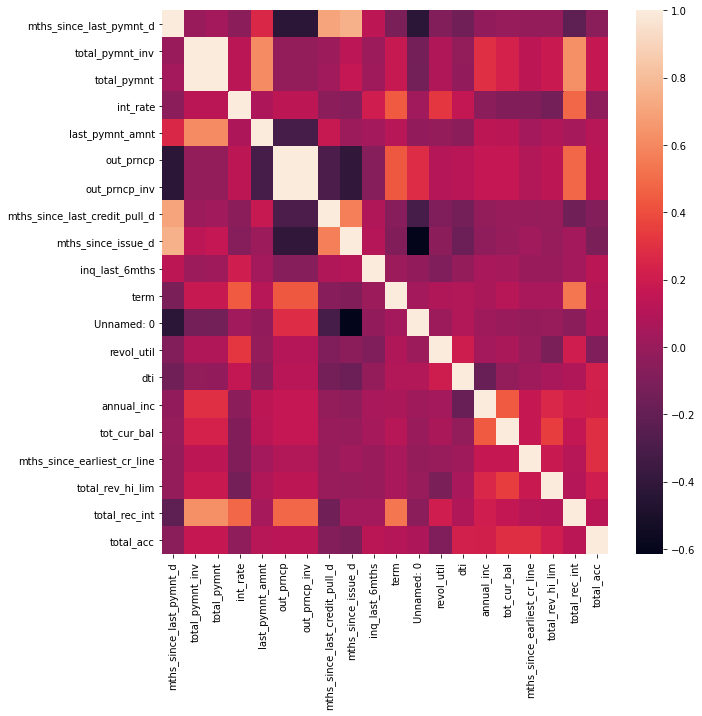

In [18]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:20,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [19]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[20:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

In [20]:
drop_columns_list

['emp_length',
 'revol_bal',
 'installment',
 'loan_amnt',
 'funded_amnt',
 'pub_rec',
 'funded_amnt_inv',
 'open_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'mths_since_last_delinq',
 'delinq_2yrs',
 'acc_now_delinq',
 'tot_coll_amt',
 'policy_code',
 'addr_state',
 'initial_list_status',
 'pymnt_plan',
 'application_type',
 'out_prncp_inv',
 'total_pymnt_inv']

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 456615 to 38736
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     373028 non-null  int64  
 1   term                           373028 non-null  int64  
 2   int_rate                       373028 non-null  float64
 3   grade                          373028 non-null  object 
 4   home_ownership                 373028 non-null  object 
 5   annual_inc                     373024 non-null  float64
 6   verification_status            373028 non-null  object 
 7   purpose                        373028 non-null  object 
 8   dti                            373028 non-null  float64
 9   inq_last_6mths                 373003 non-null  float64
 10  revol_util                     372764 non-null  float64
 11  total_acc                      373003 non-null  float64
 12  out_prncp                 

In [22]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['grade', 'home_ownership', 'verification_status', 'purpose'])

In [23]:
emp_length_converter(X_test, 'emp_length')
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

<ipython-input-12-d3b8112d5973>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [24]:
X_train.head()

,Unnamed: 0,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
456615,456615,36,8.90,A,MORTGAGE,80000.0,Source Verified,credit_card,17.01,0.0,59.0,32.0,0.00,16561.02,1561.02,8940.22,143586.0,35100.0,309.0,92.0,75.0,68.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
451541,451541,60,18.25,D,OWN,44000.0,Verified,other,23.46,1.0,32.1,25.0,5746.54,4697.52,2444.06,204.24,180443.0,41300.0,314.0,92.0,68.0,68.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
394474,394474,60,18.92,D,OWN,27000.0,Source Verified,credit_card,31.07,0.0,73.2,22.0,9282.24,6293.00,3425.24,314.65,34197.0,9800.0,372.0,88.0,68.0,68.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
110294,110294,36,6.03,A,MORTGAGE,33000.0,Not Verified,debt_consolidation,9.16,0.0,21.2,17.0,0.00,10858.01,858.01,3553.37,77959.0,10100.0,237.0,97.0,72.0,72.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139343,139343,36,12.12,B,MORTGAGE,59000.0,Verified,debt_consolidation,17.94,0.0,93.6,31.0,0.00,4736.52,1301.35,526.53,187370.0,32400.0,507.0,100.0,91.0,68.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

In [26]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']   
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum() 
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

In [27]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

In [28]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2623,0.721693,0.007032,1893.0,730.0,0.005697,0.017904,-1.144981,NaN,NaN,0.292145
1,F,10606,0.758061,0.028432,8040.0,2566.0,0.024198,0.062932,-0.955774,0.036369,0.189207,0.292145
2,E,28590,0.804477,0.076643,23000.0,5590.0,0.069224,0.137097,-0.683340,0.046416,0.272434,0.292145
3,D,61713,0.845527,0.165438,52180.0,9533.0,0.157049,0.233801,-0.397915,0.041050,0.285425,0.292145
4,C,100342,0.885870,0.268993,88890.0,11452.0,0.267536,0.280865,-0.048620,0.040343,0.349295,0.292145
5,B,109344,0.921422,0.293125,100752.0,8592.0,0.303238,0.210723,0.363975,0.035552,0.412595,0.292145
6,A,59810,0.961361,0.160336,57499.0,2311.0,0.173057,0.056678,1.116232,0.039939,0.752257,0.292145


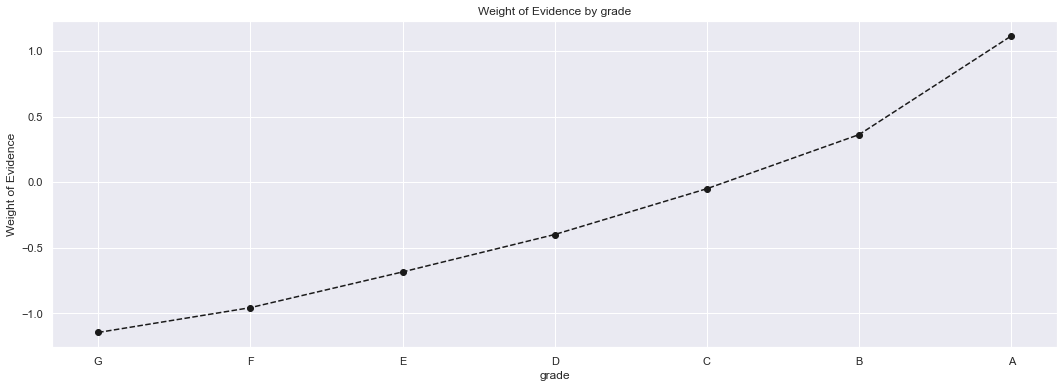

In [29]:
plot_by_woe(df_temp)

In [30]:
df_temp = woe_discrete(X_train_prepr, 'home_ownership', y_train_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,159,0.792453,0.000426,126.0,33.0,0.000379,0.000809,-0.758081,NaN,NaN,0.02166
1,NONE,41,0.853659,0.000110,35.0,6.0,0.000105,0.000147,-0.334267,0.061206,0.423814,0.02166
2,RENT,150776,0.874052,0.404195,131786.0,18990.0,0.396642,0.465738,-0.160588,0.020393,0.173678,0.02166
3,OWN,33313,0.890343,0.089304,29660.0,3653.0,0.089269,0.089591,-0.003605,0.016292,0.156984,0.02166
4,MORTGAGE,188739,0.904143,0.505965,170647.0,18092.0,0.513604,0.443714,0.146272,0.013800,0.149877,0.02166


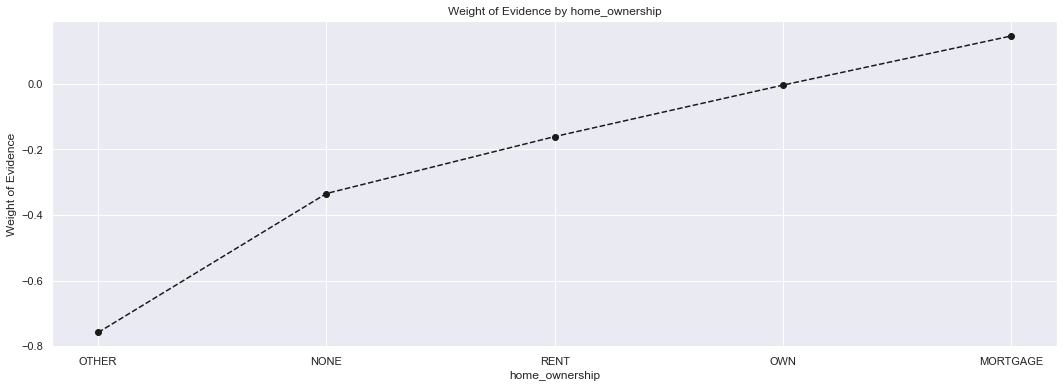

In [31]:
plot_by_woe(df_temp)

In [32]:
df_temp = woe_discrete(X_train_prepr, 'verification_status', y_train_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134571,0.872045,0.360753,117352.0,17219.0,0.353200,0.422303,-0.178691,NaN,NaN,0.022522
1,Source Verified,119969,0.895723,0.321609,107459.0,12510.0,0.323424,0.306813,0.052726,0.023678,0.231417,0.022522
2,Not Verified,118488,0.906784,0.317638,107443.0,11045.0,0.323376,0.270883,0.177128,0.011061,0.124402,0.022522


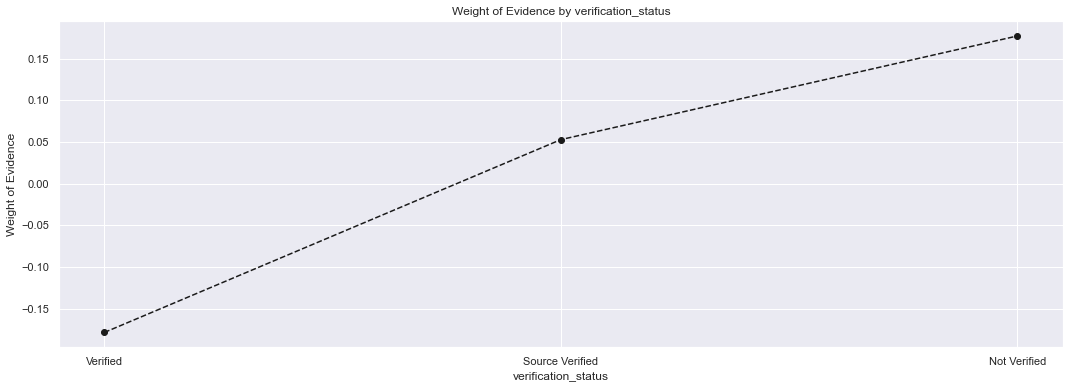

In [33]:
plot_by_woe(df_temp)

In [34]:
df_temp = woe_discrete(X_train_prepr, 'purpose', y_train_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5605,0.787333,0.015026,4413.0,1192.0,0.013282,0.029234,-0.788933,NaN,NaN,0.036668
1,educational,351,0.792023,0.000941,278.0,73.0,0.000837,0.001790,-0.760693,0.004690,0.028240,0.036668
2,renewable_energy,295,0.837288,0.000791,247.0,48.0,0.000743,0.001177,-0.459668,0.045265,0.301026,0.036668
3,moving,2397,0.848561,0.006426,2034.0,363.0,0.006122,0.008903,-0.374498,0.011273,0.085169,0.036668
4,house,1824,0.861294,0.004890,1571.0,253.0,0.004728,0.006205,-0.271777,0.012733,0.102721,0.036668
5,other,19006,0.861675,0.050951,16377.0,2629.0,0.049291,0.064477,-0.268581,0.000381,0.003196,0.036668
6,medical,3750,0.863467,0.010053,3238.0,512.0,0.009746,0.012557,-0.253469,0.001791,0.015112,0.036668
7,vacation,2003,0.875686,0.005370,1754.0,249.0,0.005279,0.006107,-0.145654,0.012220,0.107815,0.036668
8,wedding,1900,0.881053,0.005093,1674.0,226.0,0.005038,0.005543,-0.095419,0.005366,0.050235,0.036668
9,debt_consolidation,219196,0.886704,0.587613,194362.0,24834.0,0.584980,0.609065,-0.040346,0.005652,0.055072,0.036668


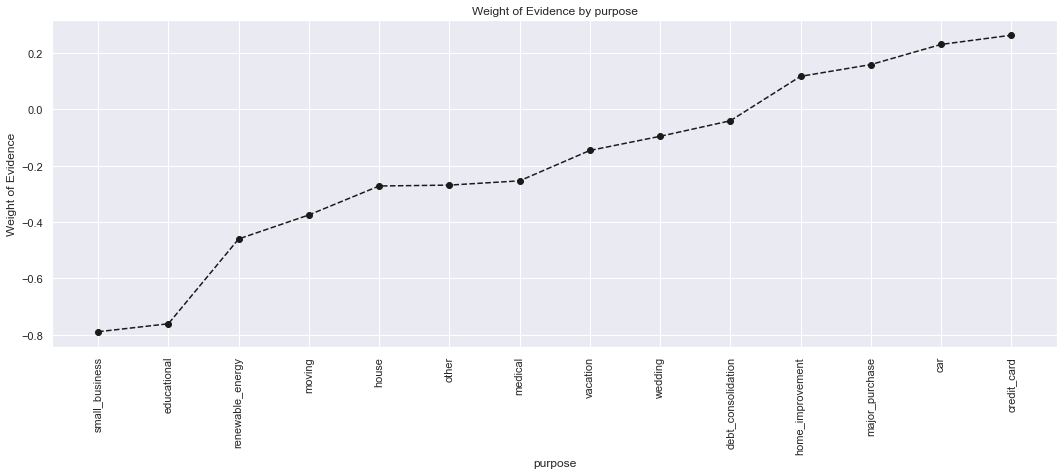

In [35]:
plot_by_woe(df_temp, 90)

In [36]:
# We define a function to calculate WoE of continuous variables. This is same as the function we defined earlier for discrete variables.
# The only difference are the 2 commented lines of code in the function that results in the df being sorted by continuous variable values
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [37]:
df_temp = woe_ordered_continuous(X_train_prepr, 'term', y_train_prepr)
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,60,102829,0.857735,0.27566,88200.0,14629.0,0.26546,0.358783,-0.301254,NaN,NaN,0.040794
1,36,270199,0.903238,0.72434,244054.0,26145.0,0.73454,0.641217,0.135876,0.045503,0.43713,0.040794


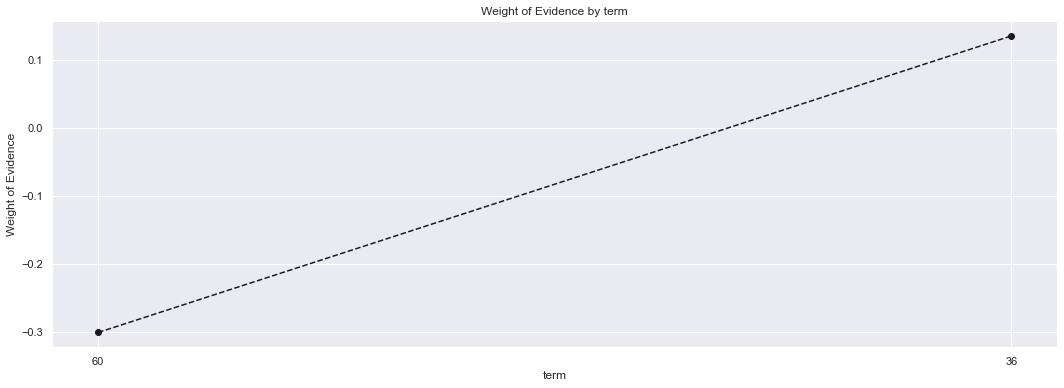

In [38]:
plot_by_woe(df_temp)

In [39]:
# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['int_rate_factor'] = pd.cut(X_train_prepr['int_rate'], 50)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'int_rate_factor', y_train_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.583, 23.996]",1595,0.727273,0.004276,1160.0,435.0,0.003491,0.010669,-1.117026,NaN,NaN,0.346603
1,"(25.234, 25.647]",774,0.736434,0.002075,570.0,204.0,0.001716,0.005003,-1.070339,0.009161,0.046687,0.346603
2,"(25.647, 26.06]",1781,0.754632,0.004774,1344.0,437.0,0.004045,0.010718,-0.974383,0.018198,0.095956,0.346603
3,"(22.345, 22.758]",2292,0.760035,0.006144,1742.0,550.0,0.005243,0.013489,-0.944984,0.005403,0.029399,0.346603
4,"(24.409, 24.822]",1660,0.760843,0.004450,1263.0,397.0,0.003801,0.009737,-0.940546,0.000808,0.004438,0.346603
5,"(21.519, 21.932]",969,0.763674,0.002598,740.0,229.0,0.002227,0.005616,-0.924927,0.002831,0.015619,0.346603
6,"(22.758, 23.17]",1490,0.765101,0.003994,1140.0,350.0,0.003431,0.008584,-0.917005,0.001427,0.007922,0.346603
7,"(24.822, 25.234]",1344,0.773810,0.003603,1040.0,304.0,0.003130,0.007456,-0.867907,0.008709,0.049098,0.346603
8,"(21.106, 21.519]",2763,0.775968,0.007407,2144.0,619.0,0.006453,0.015181,-0.855532,0.002159,0.012375,0.346603
9,"(23.17, 23.583]",2681,0.781425,0.007187,2095.0,586.0,0.006305,0.014372,-0.823866,0.005457,0.031666,0.346603


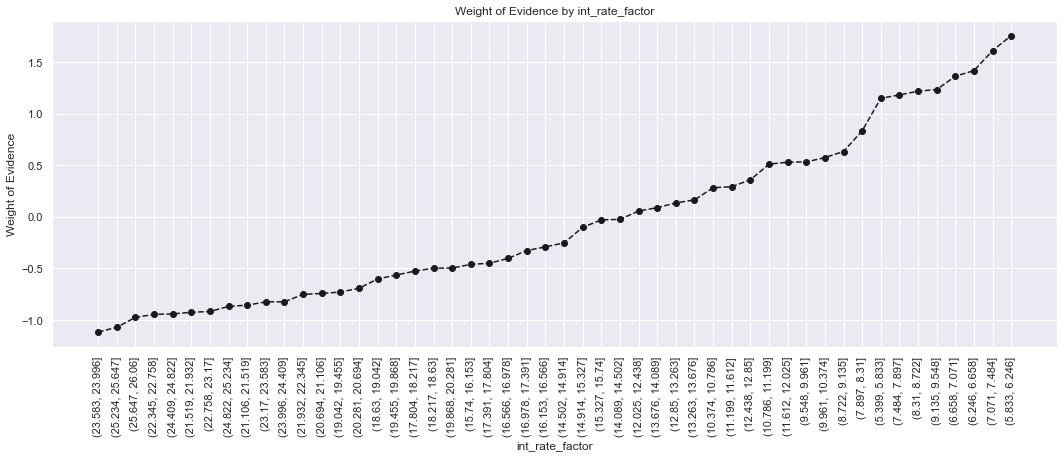

In [40]:
plot_by_woe(df_temp, 90)

In [41]:
# fine-classing
X_train_prepr['annual_inc_factor'] = pd.cut(X_train_prepr['annual_inc'], 50)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'annual_inc_factor', y_train_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1201592.64, 1351554.72]",7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.306084,NaN,NaN,inf
1,"(-5602.104, 151858.08]",356629,0.889078,0.956048,317071.0,39558.0,0.954315,0.970177,-0.016485,0.031935,0.289598,inf
2,"(601744.32, 751706.4]",96,0.906250,0.000257,87.0,9.0,0.000262,0.000221,0.170840,0.017172,0.187326,inf
3,"(151858.08, 301820.16]",14796,0.925047,0.039665,13687.0,1109.0,0.041195,0.027199,0.415145,0.018797,0.244304,inf
4,"(301820.16, 451782.24]",1076,0.930297,0.002885,1001.0,75.0,0.003013,0.001839,0.493424,0.005250,0.078279,inf
5,"(751706.4, 901668.48]",59,0.932203,0.000158,55.0,4.0,0.000166,0.000098,0.523196,0.001906,0.029772,inf
6,"(451782.24, 601744.32]",291,0.941581,0.000780,274.0,17.0,0.000825,0.000417,0.682072,0.009377,0.158876,inf
7,"(901668.48, 1051630.56]",30,0.966667,0.000080,29.0,1.0,0.000087,0.000025,1.269453,0.025086,0.587381,inf
8,"(6000379.2, 6150341.28]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.033333,inf,inf
9,"(5850417.12, 6000379.2]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


In [42]:
# Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
# Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
X_train_prepr_temp = X_train_prepr[X_train_prepr['annual_inc'] <= 150000].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 50)
# make sure to select only the relevant indexes in the target column
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'annual_inc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1747.896, 4858.08]",16,0.812500,0.000045,13.0,3.0,0.000041,0.000076,-0.614889,NaN,NaN,0.04906
1,"(4858.08, 7820.16]",45,0.822222,0.000126,37.0,8.0,0.000117,0.000202,-0.549749,0.009722,0.065139,0.04906
2,"(10782.24, 13744.32]",696,0.824713,0.001952,574.0,122.0,0.001811,0.003085,-0.532617,0.002490,0.017132,0.04906
3,"(19668.48, 22630.56]",3592,0.843820,0.010076,3031.0,561.0,0.009563,0.014185,-0.394299,0.019107,0.138319,0.04906
4,"(13744.32, 16706.4]",1392,0.847701,0.003905,1180.0,212.0,0.003723,0.005361,-0.364542,0.003882,0.029756,0.04906
5,"(7820.16, 10782.24]",342,0.847953,0.000959,290.0,52.0,0.000915,0.001315,-0.362589,0.000252,0.001954,0.04906
6,"(25592.64, 28554.72]",5729,0.848316,0.016070,4860.0,869.0,0.015334,0.021973,-0.359775,0.000362,0.002813,0.04906
7,"(16706.4, 19668.48]",1908,0.849057,0.005352,1620.0,288.0,0.005111,0.007282,-0.354005,0.000741,0.005770,0.04906
8,"(28554.72, 31516.8]",10353,0.858881,0.029041,8892.0,1461.0,0.028055,0.036942,-0.275195,0.009825,0.078810,0.04906
9,"(34478.88, 37440.96]",14199,0.858934,0.039829,12196.0,2003.0,0.038479,0.050647,-0.274764,0.000052,0.000431,0.04906


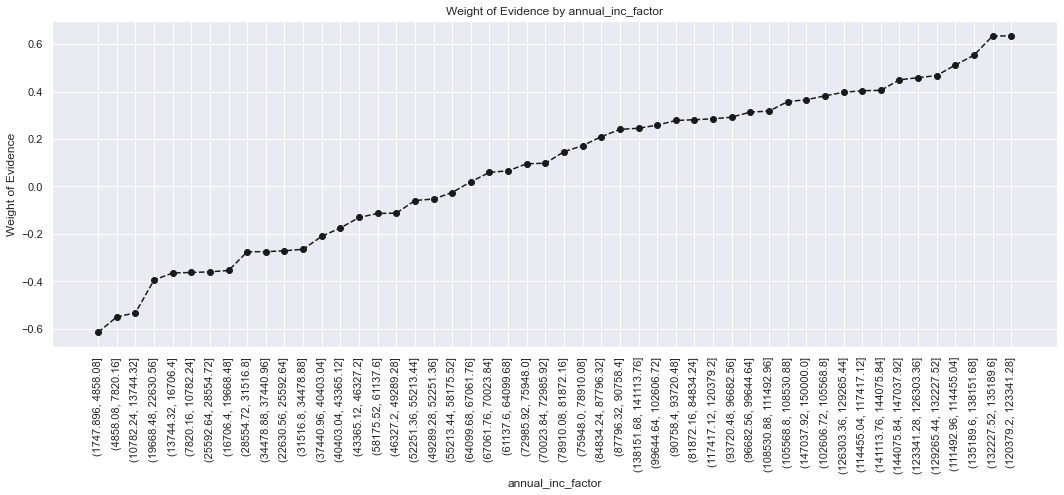

In [43]:
plot_by_woe(df_temp, 90)

In [44]:
# fine-classing
X_train_prepr['dti_factor'] = pd.cut(X_train_prepr['dti'], 50)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'dti_factor', y_train_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(29.593, 30.392]",4719,0.861835,0.012651,4067.0,652.0,0.012241,0.015991,-0.267239,NaN,NaN,0.027353
1,"(30.392, 31.192]",3803,0.863003,0.010195,3282.0,521.0,0.009878,0.012778,-0.257397,0.001168,0.009842,0.027353
2,"(31.992, 32.792]",3085,0.864182,0.008270,2666.0,419.0,0.008024,0.010276,-0.247392,0.001179,0.010005,0.027353
3,"(27.193, 27.993]",6733,0.865290,0.018050,5826.0,907.0,0.017535,0.022245,-0.237912,0.001109,0.009480,0.027353
4,"(34.391, 35.191]",1883,0.866171,0.005048,1631.0,252.0,0.004909,0.006180,-0.230336,0.000881,0.007576,0.027353
5,"(27.993, 28.793]",6330,0.866983,0.016969,5488.0,842.0,0.016517,0.020650,-0.223316,0.000812,0.007020,0.027353
6,"(28.793, 29.593]",5835,0.867009,0.015642,5059.0,776.0,0.015226,0.019032,-0.223084,0.000027,0.000232,0.027353
7,"(33.592, 34.391]",2637,0.867653,0.007069,2288.0,349.0,0.006886,0.008559,-0.217494,0.000643,0.005590,0.027353
8,"(26.393, 27.193]",7293,0.869190,0.019551,6339.0,954.0,0.019079,0.023397,-0.204042,0.001537,0.013451,0.027353
9,"(31.192, 31.992]",3486,0.870052,0.009345,3033.0,453.0,0.009129,0.011110,-0.196440,0.000862,0.007603,0.027353


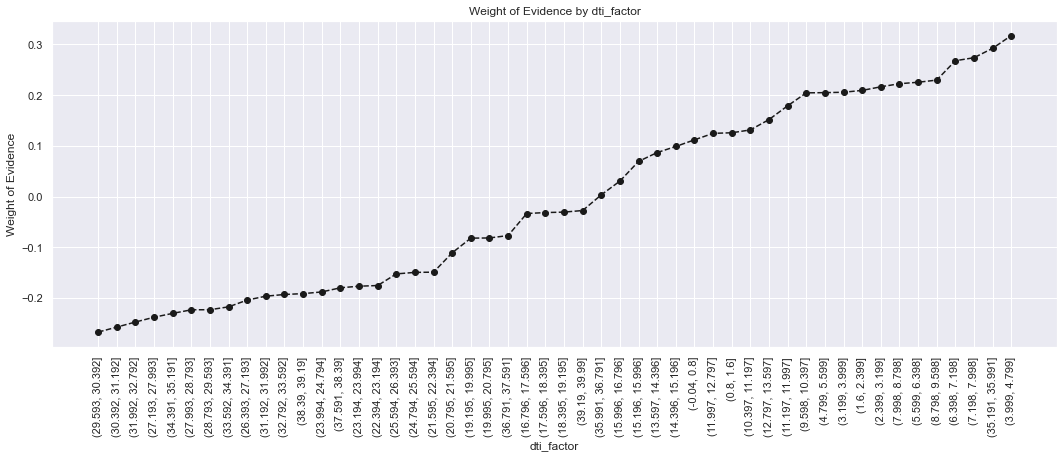

In [45]:
plot_by_woe(df_temp, 90)

**inq_last_6mths**

In [46]:
df_temp = woe_ordered_continuous(X_train_prepr, 'inq_last_6mths', y_train_prepr)
df_temp

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,33.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000025,-inf,NaN,NaN,inf
1,25.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000025,-inf,0.000000,NaN,inf
2,20.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000025,-inf,0.000000,NaN,inf
3,32.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000025,-inf,0.000000,NaN,inf
4,14.0,5,0.200000,0.000013,1.0,4.0,0.000003,0.000098,-3.484157,0.200000,inf,inf
5,18.0,3,0.333333,0.000008,1.0,2.0,0.000003,0.000049,-2.791010,0.133333,0.693147,inf
6,17.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097862,0.166667,0.693147,inf
7,12.0,14,0.571429,0.000038,8.0,6.0,0.000024,0.000147,-1.810180,0.071429,0.287682,inf
8,9.0,41,0.609756,0.000110,25.0,16.0,0.000075,0.000392,-1.651575,0.038328,0.158605,inf
9,8.0,98,0.632653,0.000263,62.0,36.0,0.000187,0.000883,-1.554247,0.022897,0.097328,inf


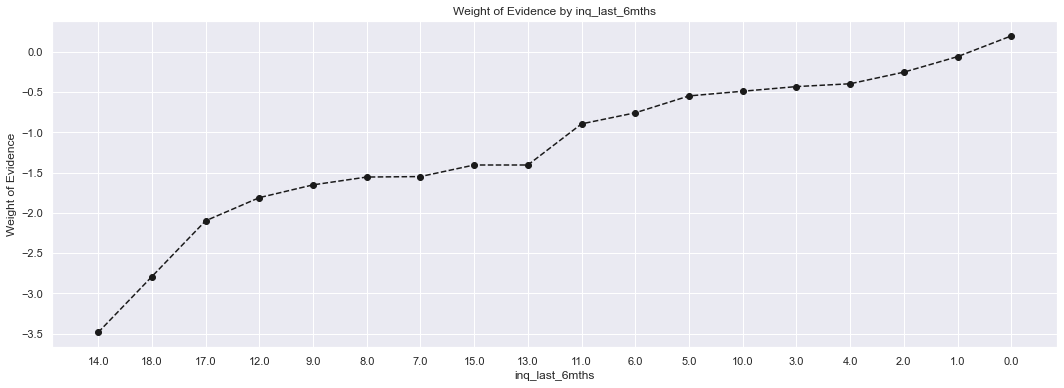

In [47]:
plot_by_woe(df_temp)

In [48]:
# Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['revol_util'] <= 1].copy()
# fine-classing
X_train_prepr_temp['revol_util_factor'] = pd.cut(X_train_prepr_temp['revol_util'], 10)
# preprocess 'revol_util'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'revol_util_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.1]",1957,0.866633,0.656271,1696.0,261.0,0.643643,0.752161,-0.155806,NaN,NaN,0.090671
1,"(0.1, 0.2]",153,0.882353,0.051308,135.0,18.0,0.051233,0.051873,-0.012411,0.015720,0.143396,0.090671
2,"(0.3, 0.4]",111,0.882883,0.037223,98.0,13.0,0.037192,0.037464,-0.007296,0.000530,0.005115,0.090671
3,"(0.6, 0.7]",117,0.905983,0.039235,106.0,11.0,0.040228,0.031700,0.238230,0.023100,0.245526,0.090671
4,"(0.8, 0.9]",87,0.908046,0.029175,79.0,8.0,0.029981,0.023055,0.262693,0.002063,0.024462,0.090671
5,"(0.4, 0.5]",110,0.909091,0.036888,100.0,10.0,0.037951,0.028818,0.275271,0.001045,0.012579,0.090671
6,"(0.7, 0.8]",111,0.927928,0.037223,103.0,8.0,0.039089,0.023055,0.527974,0.018837,0.252702,0.090671
7,"(0.2, 0.3]",136,0.941176,0.045607,128.0,8.0,0.048577,0.023055,0.745275,0.013249,0.217301,0.090671
8,"(0.5, 0.6]",94,0.946809,0.031522,89.0,5.0,0.033776,0.014409,0.851885,0.005632,0.106610,0.090671
9,"(0.9, 1.0]",106,0.952830,0.035547,101.0,5.0,0.038330,0.014409,0.978369,0.006022,0.126484,0.090671


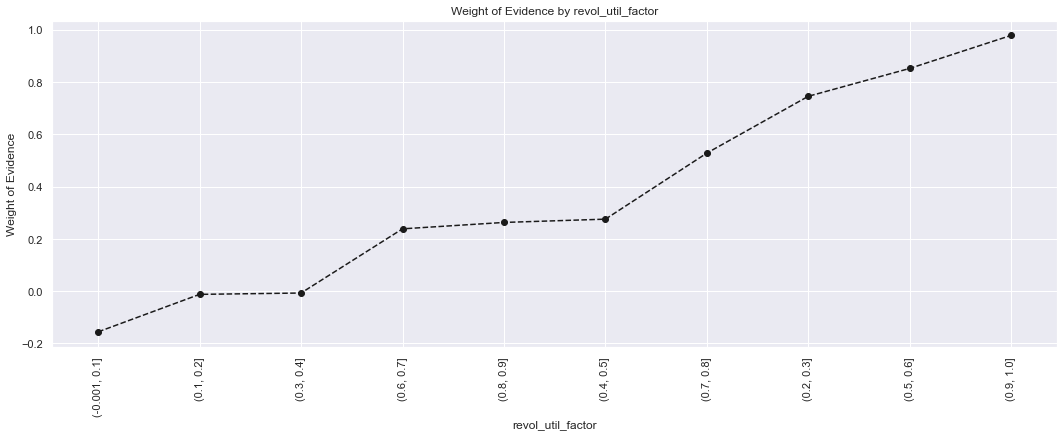

In [49]:
plot_by_woe(df_temp, 90)

In [50]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_acc'] <= 50].copy()
# fine-classing
X_train_prepr_temp['total_acc_factor'] = pd.cut(X_train_prepr_temp['total_acc'], 20)
# preprocess 'total_acc'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_acc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.951, 3.45]",462,0.800866,0.001278,370.0,92.0,0.001149,0.002320,-0.702454,NaN,NaN,0.008031
1,"(3.45, 5.9]",3117,0.861084,0.008621,2684.0,433.0,0.008338,0.010921,-0.269843,6.021858e-02,0.432611,0.008031
2,"(5.9, 8.35]",11689,0.870990,0.032330,10181.0,1508.0,0.031627,0.038033,-0.184430,9.905443e-03,0.085413,0.008031
3,"(8.35, 10.8]",13426,0.876434,0.037134,11767.0,1659.0,0.036554,0.041841,-0.135085,5.443966e-03,0.049345,0.008031
4,"(10.8, 13.25]",28228,0.880402,0.078074,24852.0,3376.0,0.077203,0.085145,-0.097922,3.968652e-03,0.037163,0.008031
5,"(13.25, 15.7]",23108,0.882465,0.063913,20392.0,2716.0,0.063348,0.068499,-0.078186,2.062510e-03,0.019736,0.008031
6,"(18.15, 20.6]",27039,0.886682,0.074785,23975.0,3064.0,0.074478,0.077276,-0.036878,4.217253e-03,0.041308,0.008031
7,"(15.7, 18.15]",38785,0.886683,0.107272,34390.0,4395.0,0.106832,0.110845,-0.036870,7.962181e-07,0.000008,0.008031
8,"(23.05, 25.5]",25768,0.890407,0.071270,22944.0,2824.0,0.071275,0.071223,0.000734,3.723710e-03,0.037604,0.008031
9,"(20.6, 23.05]",40701,0.891673,0.112572,36292.0,4409.0,0.112741,0.111198,0.013781,1.266717e-03,0.013047,0.008031


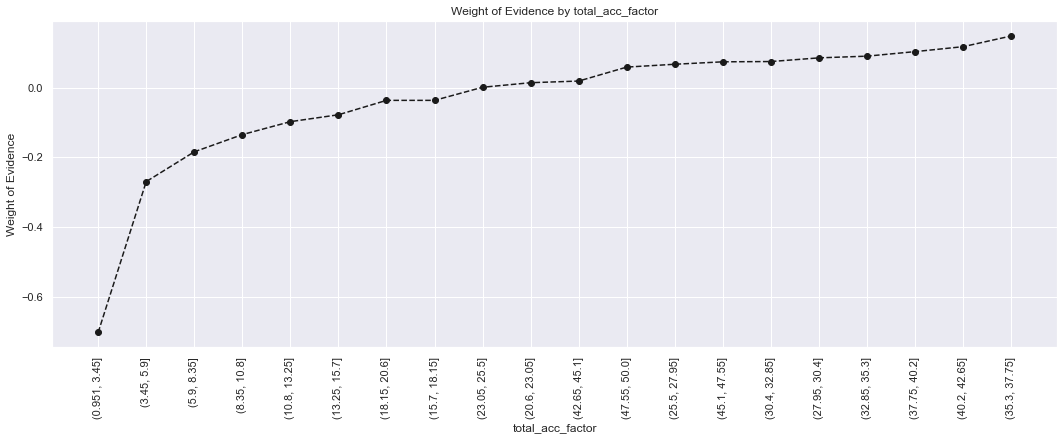

In [51]:
plot_by_woe(df_temp, 90)

In [52]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr['out_prncp_factor'] = pd.cut(X_train_prepr['out_prncp'], 25)
# We calculate weight of evidence.
df_temp = woe_ordered_continuous(X_train_prepr, 'out_prncp_factor', y_train_prepr)
df_temp

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(30873.965, 32160.38]",27,0.333333,0.000072,9.0,18.0,0.000027,0.000441,-2.791002,NaN,NaN,0.681688
1,"(-32.16, 1286.415]",196686,0.823078,0.527269,161888.0,34798.0,0.487242,0.853436,-0.560510,0.489745,2.230492,0.681688
2,"(29587.55, 30873.965]",302,0.847682,0.000810,256.0,46.0,0.000770,0.001128,-0.381319,0.024604,0.179191,0.681688
3,"(25728.304, 27014.719]",1101,0.947321,0.002952,1043.0,58.0,0.003139,0.001422,0.791558,0.099638,1.172877,0.681688
4,"(20582.643, 21869.058]",2577,0.949942,0.006908,2448.0,129.0,0.007368,0.003164,0.845359,0.002621,0.053801,0.681688
5,"(23155.474, 24441.889]",1915,0.950914,0.005134,1821.0,94.0,0.005481,0.002305,0.865991,0.000972,0.020632,0.681688
6,"(24441.889, 25728.304]",1509,0.951624,0.004045,1436.0,73.0,0.004322,0.001790,0.881302,0.000710,0.015311,0.681688
7,"(28301.134, 29587.55]",1098,0.954463,0.002943,1048.0,50.0,0.003154,0.001226,0.944761,0.002839,0.063459,0.681688
8,"(12864.152, 14150.567]",7363,0.958169,0.019738,7055.0,308.0,0.021234,0.007554,1.033537,0.003707,0.088776,0.681688
9,"(10291.322, 11577.737]",9890,0.960061,0.026513,9495.0,395.0,0.028578,0.009688,1.081780,0.001891,0.048243,0.681688


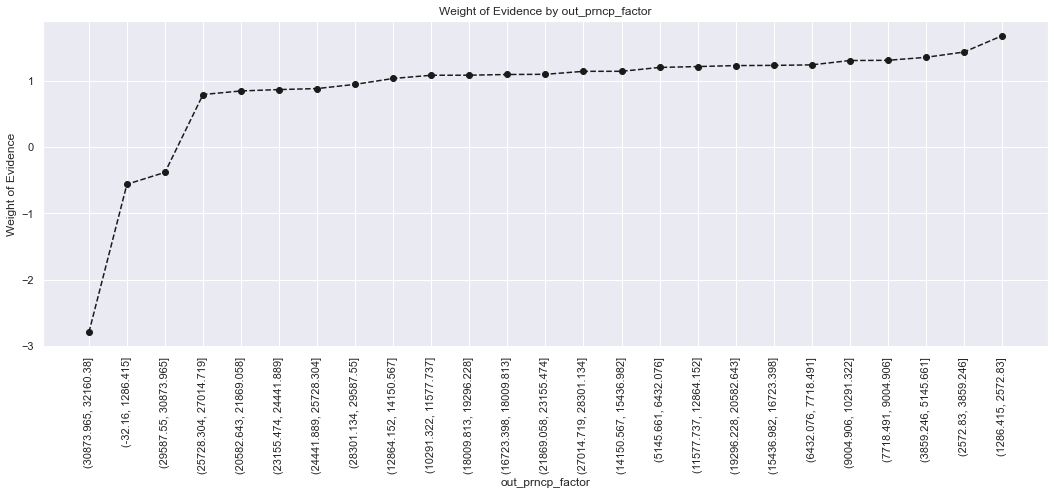

In [53]:
plot_by_woe(df_temp,90)

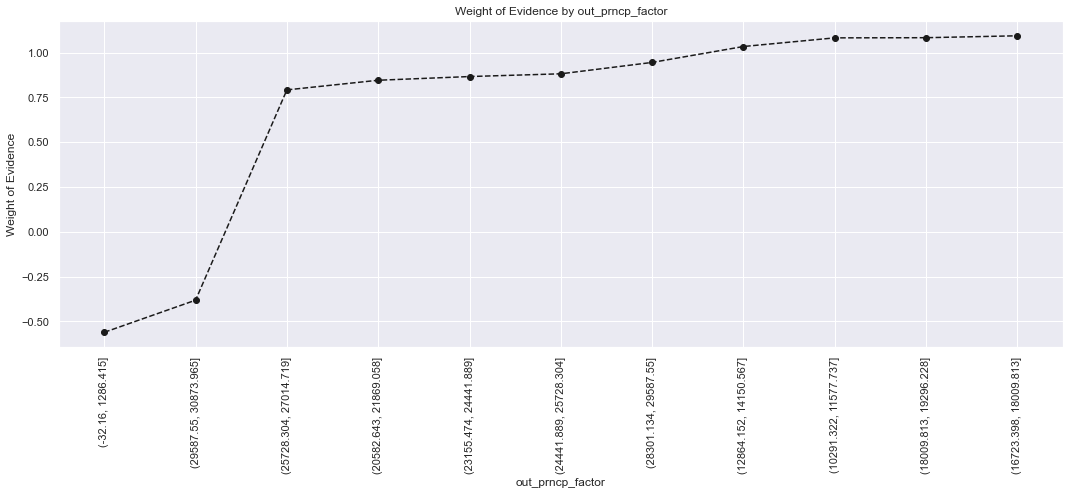

In [54]:
# We will zoom into the middle area to see more
plot_by_woe(df_temp.iloc[1:12,:],90)

In [55]:
# Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_pymnt'] <= 25000].copy()
# fine-classing
X_train_prepr_temp['total_pymnt_factor'] = pd.cut(X_train_prepr_temp['total_pymnt'], 20)
# preprocess 'total_acc'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_pymnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-25.0, 1250.0]",5609,0.473881,0.016279,2658.0,2951.0,0.008734,0.073386,-2.128553,NaN,NaN,0.548419
1,"(1250.0, 2500.0]",16242,0.685753,0.047139,11138.0,5104.0,0.036597,0.126927,-1.243645,0.211872,0.884908,0.548419
2,"(2500.0, 3750.0]",25630,0.783145,0.074386,20072.0,5558.0,0.065952,0.138217,-0.739896,0.097392,0.503749,0.548419
3,"(3750.0, 5000.0]",30880,0.833873,0.089623,25750.0,5130.0,0.084609,0.127574,-0.410654,0.050728,0.329241,0.548419
4,"(5000.0, 6250.0]",33943,0.871432,0.098513,29579.0,4364.0,0.097190,0.108525,-0.110308,0.037558,0.300347,0.548419
5,"(6250.0, 7500.0]",32268,0.891843,0.093652,28778.0,3490.0,0.094558,0.086790,0.085726,0.020412,0.196034,0.548419
6,"(7500.0, 8750.0]",28052,0.896371,0.081416,25145.0,2907.0,0.082621,0.072292,0.133554,0.004528,0.047828,0.548419
7,"(8750.0, 10000.0]",24748,0.905245,0.071826,22403.0,2345.0,0.073612,0.058316,0.232926,0.008874,0.099372,0.548419
8,"(10000.0, 11250.0]",24596,0.925760,0.071385,22770.0,1826.0,0.074817,0.045409,0.499333,0.020515,0.266407,0.548419
9,"(13750.0, 15000.0]",14622,0.932704,0.042438,13638.0,984.0,0.044812,0.024470,0.605006,0.006944,0.105673,0.548419


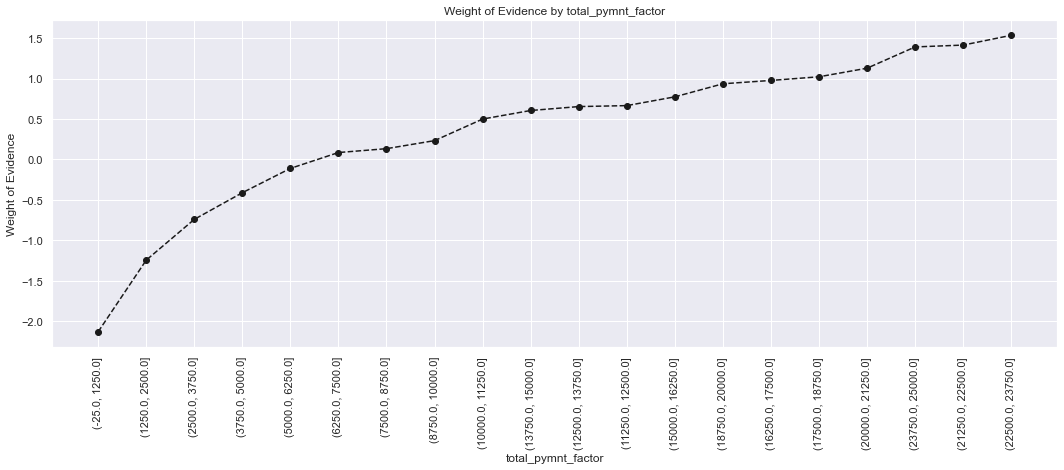

In [56]:
plot_by_woe(df_temp,90)

In [57]:
# Initial examination shows that there are vey few obs with >7,261 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rec_int'] <= 7261].copy()
# fine-classing
X_train_prepr_temp['total_rec_int_factor'] = pd.cut(X_train_prepr_temp['total_rec_int'], 20)
# preprocess 'total_rec_int'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_rec_int_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-7.261, 363.03]",22845,0.836594,0.064964,19112.0,3733.0,0.061078,0.096345,-0.455790,NaN,NaN,0.024917
1,"(363.03, 726.061]",41058,0.872546,0.116755,35825.0,5233.0,0.114489,0.135059,-0.165233,0.035952,0.290557,0.024917
2,"(726.061, 1089.092]",45720,0.890332,0.130013,40706.0,5014.0,0.130088,0.129407,0.005247,0.017786,0.170480,0.024917
3,"(6534.549, 6897.579]",3483,0.891473,0.009905,3105.0,378.0,0.009923,0.009756,0.016980,0.001140,0.011733,0.024917
4,"(1089.092, 1452.122]",41081,0.892797,0.116821,36677.0,4404.0,0.117212,0.113663,0.030742,0.001324,0.013762,0.024917
5,"(3630.305, 3993.335]",10758,0.893661,0.030592,9614.0,1144.0,0.030724,0.029526,0.039795,0.000863,0.009053,0.024917
6,"(5445.457, 5808.488]",5117,0.896228,0.014551,4586.0,531.0,0.014656,0.013705,0.067107,0.002568,0.027312,0.024917
7,"(5082.427, 5445.457]",5646,0.896741,0.016055,5063.0,583.0,0.016180,0.015047,0.072633,0.000513,0.005526,0.024917
8,"(1452.122, 1815.152]",35526,0.896977,0.101024,31866.0,3660.0,0.101837,0.094461,0.075182,0.000236,0.002549,0.024917
9,"(3267.274, 3630.305]",13114,0.897819,0.037292,11774.0,1340.0,0.037627,0.034584,0.084330,0.000842,0.009148,0.024917


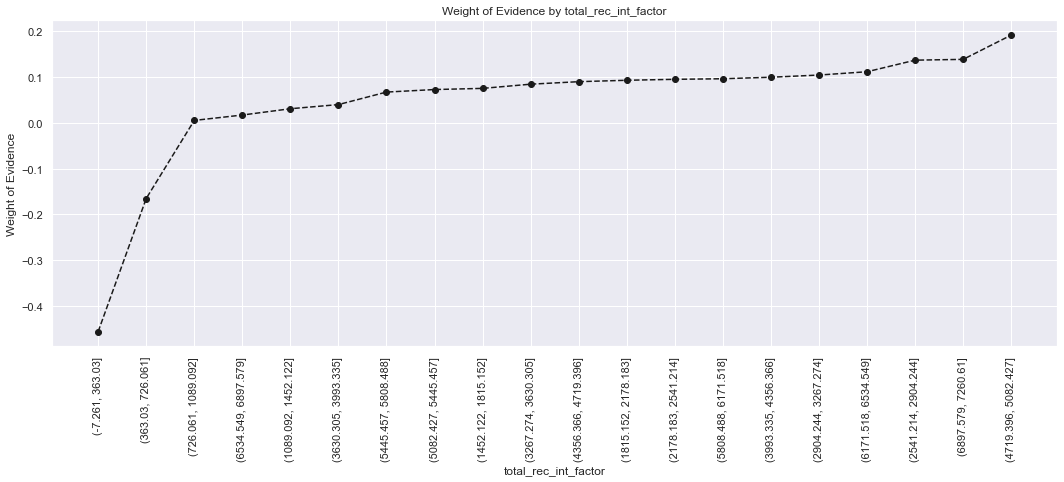

In [58]:
plot_by_woe(df_temp, 90)

In [59]:
# Initial examination shows that there are vey few obs with 10,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['last_pymnt_amnt'] <= 10000].copy()
# fine-classing
X_train_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(X_train_prepr_temp['last_pymnt_amnt'], 15)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'last_pymnt_amnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-10.0, 666.667]",215272,0.843923,0.648462,181673.0,33599.0,0.623815,0.824637,-0.279089,NaN,NaN,1.036149
1,"(666.667, 1333.333]",46885,0.857865,0.141231,40221.0,6664.0,0.138108,0.163558,-0.169132,0.013942,0.109957,1.036149
2,"(1333.333, 2000.0]",6464,0.953434,0.019471,6163.0,301.0,0.021162,0.007388,1.052407,0.095569,1.221539,1.036149
3,"(2000.0, 2666.667]",6350,0.985197,0.019128,6256.0,94.0,0.021481,0.002307,2.231200,0.031762,1.178793,1.036149
4,"(2666.667, 3333.333]",6270,0.996332,0.018887,6247.0,23.0,0.021450,0.000565,3.637561,0.011135,1.406361,1.036149
5,"(3333.333, 4000.0]",6331,0.997473,0.019071,6315.0,16.0,0.021684,0.000393,4.011293,0.001141,0.373732,1.036149
6,"(4000.0, 4666.667]",6215,0.997908,0.018721,6202.0,13.0,0.021296,0.000319,4.200876,0.000436,0.189583,1.036149
7,"(4666.667, 5333.333]",6158,0.998701,0.018550,6150.0,8.0,0.021117,0.000196,4.677965,0.000793,0.477088,1.036149
8,"(9333.333, 10000.0]",3685,0.998915,0.011100,3681.0,4.0,0.012640,0.000098,4.857844,0.000214,0.179880,1.036149
9,"(5333.333, 6000.0]",5619,0.998932,0.016926,5613.0,6.0,0.019273,0.000147,4.874280,0.000018,0.016436,1.036149


In [60]:
# Again, because of very few obs > 64,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['tot_cur_bal'] <= 64000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'tot_cur_bal_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(17920.0, 20480.0]",8406,0.878420,0.058498,7384.0,1022.0,0.058046,0.061984,-0.065652,NaN,NaN,0.00311
1,"(25600.0, 28160.0]",7839,0.878684,0.054552,6888.0,951.0,0.054147,0.057678,-0.063184,0.000263,0.002468,0.00311
2,"(43520.0, 46080.0]",4637,0.879664,0.032269,4079.0,558.0,0.032065,0.033843,-0.053958,0.000980,0.009226,0.00311
3,"(40960.0, 43520.0]",5017,0.880407,0.034913,4417.0,600.0,0.034722,0.036390,-0.046920,0.000743,0.007038,0.00311
4,"(20480.0, 23040.0]",8246,0.880669,0.057384,7262.0,984.0,0.057087,0.059680,-0.044422,0.000263,0.002498,0.00311
5,"(23040.0, 25600.0]",8260,0.880993,0.057482,7277.0,983.0,0.057205,0.059619,-0.041342,0.000323,0.003080,0.00311
6,"(33280.0, 35840.0]",6457,0.881524,0.044935,5692.0,765.0,0.044745,0.046397,-0.036265,0.000531,0.005076,0.00311
7,"(12800.0, 15360.0]",8321,0.882706,0.057906,7345.0,976.0,0.057739,0.059195,-0.024894,0.001182,0.011371,0.00311
8,"(61440.0, 64000.0]",2669,0.882728,0.018574,2356.0,313.0,0.018521,0.018984,-0.024689,0.000021,0.000205,0.00311
9,"(58880.0, 61440.0]",2795,0.883005,0.019451,2468.0,327.0,0.019401,0.019833,-0.022003,0.000278,0.002686,0.00311


In [61]:
# initial examination reveals very few obs > 79,780, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rev_hi_lim'] <= 79780].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-79.767, 3190.68]",3574,0.866256,0.011821,3096.0,478.0,0.011419,0.015309,-0.293149,NaN,NaN,0.022189
1,"(3190.68, 6381.36]",14632,0.880331,0.048394,12881.0,1751.0,0.047509,0.056079,-0.165838,1.407449e-02,0.127311,0.022189
2,"(6381.36, 9572.04]",24622,0.885306,0.081435,21798.0,2824.0,0.080397,0.090443,-0.117740,4.975042e-03,0.048098,0.022189
3,"(9572.04, 12762.72]",29008,0.885790,0.095941,25695.0,3313.0,0.094771,0.106104,-0.112962,4.843028e-04,0.004778,0.022189
4,"(12762.72, 15953.4]",29826,0.887481,0.098647,26470.0,3356.0,0.097629,0.107481,-0.096142,1.690595e-03,0.016820,0.022189
5,"(15953.4, 19144.08]",28069,0.888703,0.092836,24945.0,3124.0,0.092005,0.100051,-0.083845,1.222118e-03,0.012297,0.022189
6,"(19144.08, 22334.76]",25057,0.893762,0.082874,22395.0,2662.0,0.082599,0.085255,-0.031644,5.059383e-03,0.052201,0.022189
7,"(22334.76, 25525.44]",22187,0.893767,0.073381,19830.0,2357.0,0.073139,0.075487,-0.031598,4.397959e-06,0.000046,0.022189
8,"(25525.44, 28716.12]",19265,0.897898,0.063717,17298.0,1967.0,0.063800,0.062996,0.012677,4.131122e-03,0.044275,0.022189
9,"(28716.12, 31906.8]",16446,0.898760,0.054394,14781.0,1665.0,0.054517,0.053324,0.022113,8.618348e-04,0.009436,0.022189


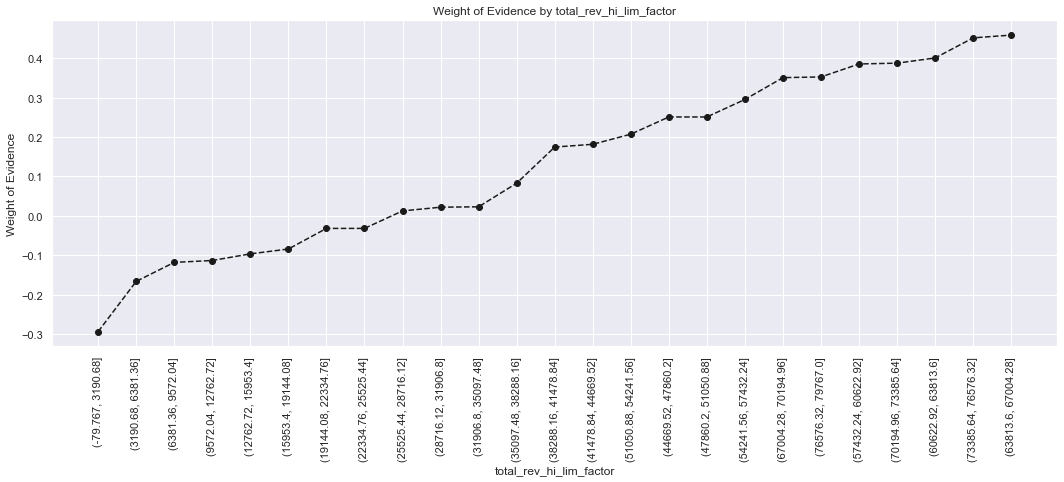

In [62]:
plot_by_woe(df_temp, 90)

In [63]:
# fine-classing
X_train_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(X_train_prepr['mths_since_earliest_cr_line'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, 'mths_since_earliest_cr_line_factor', y_train_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(159.12, 179.68]",15672,0.862557,0.042016,13518.0,2154.0,0.040688,0.052832,-0.261167,NaN,NaN,0.016102
1,"(138.56, 159.12]",6388,0.865529,0.017126,5529.0,859.0,0.016642,0.021069,-0.235869,0.002972,0.025298,0.016102
2,"(179.68, 200.24]",23403,0.873948,0.062742,20453.0,2950.0,0.061562,0.072355,-0.161538,0.008419,0.074331,0.016102
3,"(200.24, 220.8]",30963,0.882860,0.083010,27336.0,3627.0,0.082280,0.088960,-0.078064,0.008912,0.083474,0.016102
4,"(241.36, 261.92]",45873,0.884071,0.122983,40555.0,5318.0,0.122068,0.130436,-0.066301,0.001211,0.011763,0.016102
5,"(611.44, 632.0]",1487,0.884331,0.003987,1315.0,172.0,0.003958,0.004219,-0.063765,0.000260,0.002536,0.016102
6,"(220.8, 241.36]",41418,0.886088,0.111039,36700.0,4718.0,0.110465,0.115720,-0.046471,0.001757,0.017294,0.016102
7,"(261.92, 282.48]",43012,0.888403,0.115313,38212.0,4800.0,0.115016,0.117731,-0.023329,0.002315,0.023142,0.016102
8,"(282.48, 303.04]",33146,0.891390,0.088863,29546.0,3600.0,0.088932,0.088298,0.007152,0.002986,0.030481,0.016102
9,"(117.486, 138.56]",2650,0.895094,0.007105,2372.0,278.0,0.007140,0.006819,0.046005,0.003705,0.038853,0.016102


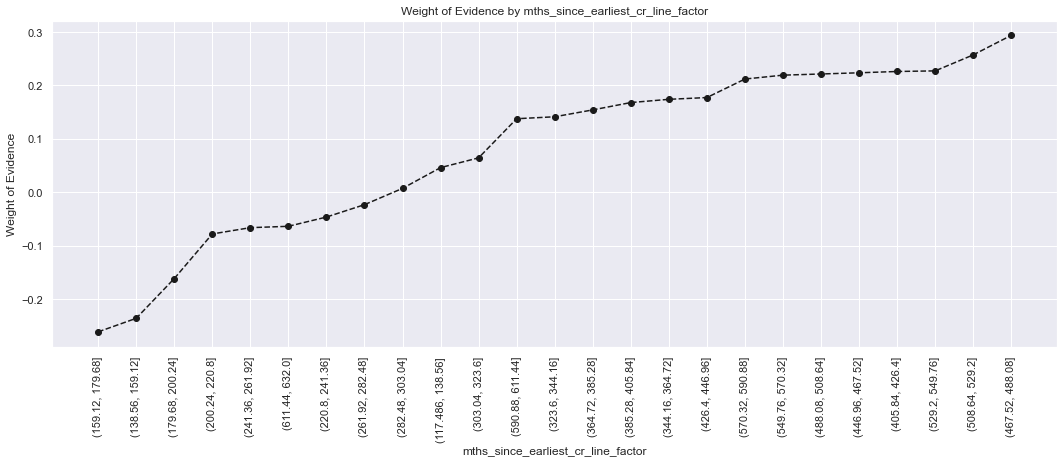

In [64]:
plot_by_woe(df_temp, 90)

In [65]:
# fine-classing
X_train_prepr['mths_since_issue_d_factor'] = pd.cut(X_train_prepr['mths_since_issue_d'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_issue_d_factor", y_train_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(163.8, 167.4]",551,0.722323,0.001477,398.0,153.0,0.001198,0.003752,-1.141841,NaN,NaN,0.107728
1,"(160.2, 163.8]",761,0.776610,0.002040,591.0,170.0,0.001779,0.004169,-0.851838,0.054287,0.290003,0.107728
2,"(156.6, 160.2]",374,0.810160,0.001003,303.0,71.0,0.000912,0.001741,-0.646802,0.033551,0.205035,0.107728
3,"(153.0, 156.6]",324,0.820988,0.000869,266.0,58.0,0.000801,0.001422,-0.574802,0.010827,0.072000,0.107728
4,"(167.4, 171.0]",176,0.829545,0.000472,146.0,30.0,0.000439,0.000736,-0.515446,0.008558,0.059356,0.107728
5,"(109.8, 113.4]",11976,0.832749,0.032105,9973.0,2003.0,0.030016,0.049124,-0.492620,0.003203,0.022826,0.107728
6,"(113.4, 117.0]",8304,0.834176,0.022261,6927.0,1377.0,0.020849,0.033772,-0.482336,0.001427,0.010284,0.107728
7,"(131.4, 135.0]",3714,0.841411,0.009956,3125.0,589.0,0.009405,0.014445,-0.429092,0.007235,0.053244,0.107728
8,"(120.6, 124.2]",5880,0.849660,0.015763,4996.0,884.0,0.015037,0.021680,-0.365919,0.008249,0.063172,0.107728
9,"(106.2, 109.8]",14249,0.849954,0.038198,12111.0,2138.0,0.036451,0.052435,-0.363612,0.000295,0.002308,0.107728


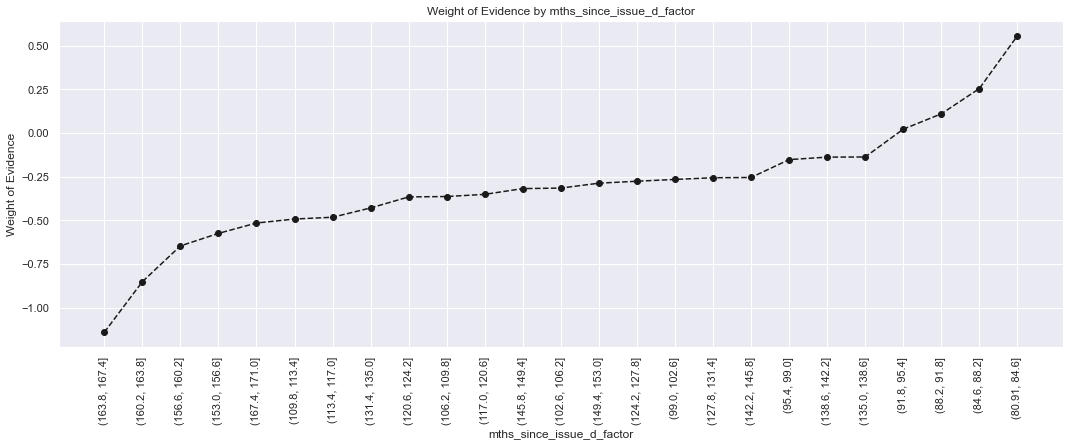

In [66]:
plot_by_woe(df_temp, 90)

In [67]:
# fine-classing
X_train_prepr['mths_since_last_pymnt_d_factor'] = pd.cut(X_train_prepr['mths_since_last_pymnt_d'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_last_pymnt_d_factor", y_train_prepr)
df_temp

,mths_since_last_pymnt_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(153.36, 157.24]",118,0.423729,0.000317,50.0,68.0,0.000150,0.001681,-2.412996,NaN,NaN,1.281457
1,"(157.24, 161.12]",87,0.471264,0.000233,41.0,46.0,0.000123,0.001137,-2.220581,0.047536,0.192415,1.281457
2,"(149.48, 153.36]",161,0.478261,0.000432,77.0,84.0,0.000232,0.002076,-2.192523,0.006997,0.028058,1.281457
3,"(161.12, 165.0]",31,0.483871,0.000083,15.0,16.0,0.000045,0.000395,-2.170050,0.005610,0.022473,1.281457
4,"(145.6, 149.48]",219,0.515982,0.000588,113.0,106.0,0.000340,0.002620,-2.041563,0.032111,0.128487,1.281457
5,"(141.72, 145.6]",226,0.588496,0.000606,133.0,93.0,0.000400,0.002298,-1.747762,0.072514,0.293801,1.281457
6,"(137.84, 141.72]",420,0.659524,0.001127,277.0,143.0,0.000834,0.003534,-1.444339,0.071028,0.303423,1.281457
7,"(133.96, 137.84]",549,0.695811,0.001473,382.0,167.0,0.001150,0.004127,-1.278085,0.036287,0.166254,1.281457
8,"(130.08, 133.96]",557,0.716338,0.001494,399.0,158.0,0.001201,0.003905,-1.179145,0.020527,0.098940,1.281457
9,"(95.16, 99.04]",7548,0.740991,0.020251,5593.0,1955.0,0.016834,0.048316,-1.054386,0.024653,0.124759,1.281457


In [68]:
# filter out all values > 75 given the low obs
X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
X_train_prepr_temp['mths_since_last_credit_pull_d_factor'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 25)
# Calculate WoE
df_temp = woe_ordered_continuous(X_train_prepr_temp, "mths_since_last_credit_pull_d_factor", y_train_prepr[X_train_prepr_temp.index])
df_temp

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(68.84, 69.12]",11272,0.779010,0.036473,8781.0,2491.0,0.031105,0.093125,-1.096585,NaN,NaN,0.18729
1,"(74.72, 75.0]",4958,0.838040,0.016043,4155.0,803.0,0.014718,0.030020,-0.712778,0.059030,0.383807,0.18729
2,"(72.76, 73.04]",5283,0.841946,0.017094,4448.0,835.0,0.015756,0.031216,-0.683713,0.003906,0.029065,0.18729
3,"(73.88, 74.16]",5900,0.851525,0.019091,5024.0,876.0,0.017796,0.032749,-0.609875,0.009580,0.073838,0.18729
4,"(71.92, 72.2]",6421,0.878056,0.020776,5638.0,783.0,0.019971,0.029272,-0.382339,0.026531,0.227536,0.18729
5,"(67.993, 68.28]",262140,0.920691,0.848201,241350.0,20790.0,0.854926,0.777225,0.095285,0.042635,0.477624,0.18729
6,"(70.8, 71.08]",6386,0.985437,0.020663,6293.0,93.0,0.022291,0.003477,1.858103,0.064746,1.762818,0.18729
7,"(69.96, 70.24]",6694,0.988348,0.021660,6616.0,78.0,0.023436,0.002916,2.084046,0.002911,0.225944,0.18729
8,"(68.28, 68.56]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18729
9,"(68.56, 68.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18729


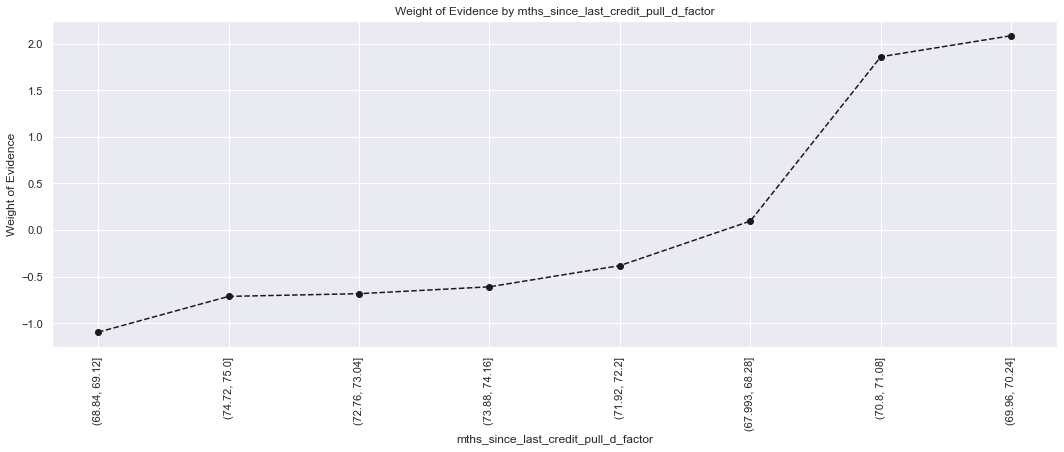

In [69]:
plot_by_woe(df_temp, 90)

In [70]:
#cut-off points
# create a list of all the reference categories, i.e. one category from each of the global features
ref_categories = ['mths_since_last_credit_pull_d:>75', 'mths_since_issue_d:>122', 'mths_since_earliest_cr_line:>434', 'total_rev_hi_lim:>79,780', 
                  'total_rec_int:>7,260', 'total_pymnt:>25,000', 'out_prncp:>15,437', 'revol_util:>1.0', 'inq_last_6mths:>4', 'dti:>35.191', 
                  'annual_inc:>150K', 'int_rate:>20.281', 'term:60', 'purpose:major_purch__car__home_impr', 'verification_status:Not Verified', 
                  'home_ownership:MORTGAGE', 'grade:G']

In [71]:
# This custom class will create new categorical dummy features based on the cut-off points that we manually identified
# based on the WoE plots and IV above.
# Given the way it is structured, this class also allows a fit_transform method to be implemented on it, thereby allowing 
# us to use it as part of a scikit-learn Pipeline 
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'grade:A': 'grade:G']
        X_new['home_ownership:OWN'] = X.loc[:,'home_ownership:OWN']
        X_new['home_ownership:MORTGAGE'] = X.loc[:,'home_ownership:MORTGAGE']
        X_new['home_ownership:OTHER_NONE_RENT'] = sum([X['home_ownership:OTHER'], X['home_ownership:NONE'], X['home_ownership:RENT']])
        X_new = pd.concat([X_new, X.loc[:, 'verification_status:Not Verified':'verification_status:Verified']], axis = 1)
        # For the purpose of this column, we keep debt_consolidation (due to volume) and credit_card (due to unique characteristics) as separate cateogories
        # These categories have very few observations: educational, renewable_energy, vacation, house, wedding, car
        # car is the least risky so we will combine it with the other 2 least risky categories: home_improvement and major_purchase
        # educational, renewable_energy (both low observations) will be combined with small_business and moving
        # vacation, house and wedding (remaining 3 with low observations) will be combined with medical and other
        X_new['purpose:debt_consolidation'] = X.loc[:,'purpose:debt_consolidation']
        X_new['purpose:credit_card'] = X.loc[:,'purpose:credit_card']
        X_new['purpose:major_purch__car__home_impr'] = sum([X['purpose:major_purchase'], X['purpose:car'], X['purpose:home_improvement']])
        X_new['purpose:educ__ren_en__sm_b__mov'] = sum([X['purpose:educational'], X['purpose:renewable_energy'], X['purpose:small_business'], 
                                                        X['purpose:moving']])
        X_new['purpose:vacation__house__wedding__med__oth'] = sum([X['purpose:vacation'], X['purpose:house'], X['purpose:wedding'], 
                                                                   X['purpose:medical'], X['purpose:other']])
        X_new['term:36'] = np.where((X['term'] == 36), 1, 0)
        X_new['term:60'] = np.where((X['term'] == 60), 1, 0)
        X_new['int_rate:<7.071'] = np.where((X['int_rate'] <= 7.071), 1, 0)
        X_new['int_rate:7.071-10.374'] = np.where((X['int_rate'] > 7.071) & (X['int_rate'] <= 10.374), 1, 0)
        X_new['int_rate:10.374-13.676'] = np.where((X['int_rate'] > 10.374) & (X['int_rate'] <= 13.676), 1, 0)
        X_new['int_rate:13.676-15.74'] = np.where((X['int_rate'] > 13.676) & (X['int_rate'] <= 15.74), 1, 0)
        X_new['int_rate:15.74-20.281'] = np.where((X['int_rate'] > 15.74) & (X['int_rate'] <= 20.281), 1, 0)
        X_new['int_rate:>20.281'] = np.where((X['int_rate'] > 20.281), 1, 0)
        X_new['annual_inc:missing'] = np.where(X['annual_inc'].isnull(), 1, 0)
        X_new['annual_inc:<28,555'] = np.where((X['annual_inc'] <= 28555), 1, 0)
        X_new['annual_inc:28,555-37,440'] = np.where((X['annual_inc'] > 28555) & (X['annual_inc'] <= 37440), 1, 0)
        X_new['annual_inc:37,440-61,137'] = np.where((X['annual_inc'] > 37440) & (X['annual_inc'] <= 61137), 1, 0)
        X_new['annual_inc:61,137-81,872'] = np.where((X['annual_inc'] > 61137) & (X['annual_inc'] <= 81872), 1, 0)
        X_new['annual_inc:81,872-102,606'] = np.where((X['annual_inc'] > 81872) & (X['annual_inc'] <= 102606), 1, 0)
        X_new['annual_inc:102,606-120,379'] = np.where((X['annual_inc'] > 102606) & (X['annual_inc'] <= 120379), 1, 0)
        X_new['annual_inc:120,379-150,000'] = np.where((X['annual_inc'] > 120379) & (X['annual_inc'] <= 150000), 1, 0)
        X_new['annual_inc:>150K'] = np.where((X['annual_inc'] > 150000), 1, 0)
        X_new['dti:<=1.6'] = np.where((X['dti'] <= 1.6), 1, 0)
        X_new['dti:1.6-5.599'] = np.where((X['dti'] > 1.6) & (X['dti'] <= 5.599), 1, 0)
        X_new['dti:5.599-10.397'] = np.where((X['dti'] > 5.599) & (X['dti'] <= 10.397), 1, 0)
        X_new['dti:10.397-15.196'] = np.where((X['dti'] > 10.397) & (X['dti'] <= 15.196), 1, 0)
        X_new['dti:15.196-19.195'] = np.where((X['dti'] > 15.196) & (X['dti'] <= 19.195), 1, 0)
        X_new['dti:19.195-24.794'] = np.where((X['dti'] > 19.195) & (X['dti'] <= 24.794), 1, 0)
        X_new['dti:24.794-35.191'] = np.where((X['dti'] > 24.794) & (X['dti'] <= 35.191), 1, 0)
        X_new['dti:>35.191'] = np.where((X['dti'] > 35.191), 1, 0)
        X_new['inq_last_6mths:missing'] = np.where(X['inq_last_6mths'].isnull(), 1, 0)
        X_new['inq_last_6mths:0'] = np.where((X['inq_last_6mths'] == 0), 1, 0)
        X_new['inq_last_6mths:1-2'] = np.where((X['inq_last_6mths'] >= 1) & (X['inq_last_6mths'] <= 2), 1, 0)
        X_new['inq_last_6mths:3-4'] = np.where((X['inq_last_6mths'] >= 3) & (X['inq_last_6mths'] <= 4), 1, 0)
        X_new['inq_last_6mths:>4'] = np.where((X['inq_last_6mths'] > 4), 1, 0)
        # We will discretize on the deciles for revol_util
        X_new['revol_util:missing'] = np.where(X['revol_util'].isnull(), 1, 0)
        X_new['revol_util:<0.1'] = np.where((X['revol_util'] <= 0.1), 1, 0)
        X_new['revol_util:0.1-0.2'] = np.where((X['revol_util'] > 0.1) & (X['revol_util'] <= 0.2), 1, 0)
        X_new['revol_util:0.2-0.3'] = np.where((X['revol_util'] > 0.2) & (X['revol_util'] <= 0.3), 1, 0)
        X_new['revol_util:0.3-0.4'] = np.where((X['revol_util'] > 0.3) & (X['revol_util'] <= 0.4), 1, 0)
        X_new['revol_util:0.4-0.5'] = np.where((X['revol_util'] > 0.4) & (X['revol_util'] <= 0.5), 1, 0)
        X_new['revol_util:0.5-0.6'] = np.where((X['revol_util'] > 0.5) & (X['revol_util'] <= 0.6), 1, 0)
        X_new['revol_util:0.6-0.7'] = np.where((X['revol_util'] > 0.6) & (X['revol_util'] <= 0.7), 1, 0)
        X_new['revol_util:0.7-0.8'] = np.where((X['revol_util'] > 0.7) & (X['revol_util'] <= 0.8), 1, 0)
        X_new['revol_util:0.8-0.9'] = np.where((X['revol_util'] > 0.8) & (X['revol_util'] <= 0.9), 1, 0)
        X_new['revol_util:0.9-1.0'] = np.where((X['revol_util'] > 0.9) & (X['revol_util'] <= 1.0), 1, 0)
        X_new['revol_util:>1.0'] = np.where((X['revol_util'] > 1.0), 1, 0)
        X_new['out_prncp:<1,286'] = np.where((X['out_prncp'] <= 1286), 1, 0)
        X_new['out_prncp:1,286-6,432'] = np.where((X['out_prncp'] > 1286) & (X['out_prncp'] <= 6432), 1, 0)
        X_new['out_prncp:6,432-9,005'] = np.where((X['out_prncp'] > 6432) & (X['out_prncp'] <= 9005), 1, 0)
        X_new['out_prncp:9,005-10,291'] = np.where((X['out_prncp'] > 9005) & (X['out_prncp'] <= 10291), 1, 0)
        X_new['out_prncp:10,291-15,437'] = np.where((X['out_prncp'] > 10291) & (X['out_prncp'] <= 15437), 1, 0)
        X_new['out_prncp:>15,437'] = np.where((X['out_prncp'] > 15437), 1, 0)
        X_new['total_pymnt:<10,000'] = np.where((X['total_pymnt'] <= 10000), 1, 0)
        X_new['total_pymnt:10,000-15,000'] = np.where((X['total_pymnt'] > 10000) & (X['total_pymnt'] <= 15000), 1, 0)
        X_new['total_pymnt:15,000-20,000'] = np.where((X['total_pymnt'] > 15000) & (X['total_pymnt'] <= 20000), 1, 0)
        X_new['total_pymnt:20,000-25,000'] = np.where((X['total_pymnt'] > 20000) & (X['total_pymnt'] <= 25000), 1, 0)
        X_new['total_pymnt:>25,000'] = np.where((X['total_pymnt'] > 25000), 1, 0)
        X_new['total_rec_int:<1,089'] = np.where((X['total_rec_int'] <= 1089), 1, 0)
        X_new['total_rec_int:1,089-2,541'] = np.where((X['total_rec_int'] > 1089) & (X['total_rec_int'] <= 2541), 1, 0)
        X_new['total_rec_int:2,541-4,719'] = np.where((X['total_rec_int'] > 2541) & (X['total_rec_int'] <= 4719), 1, 0)
        X_new['total_rec_int:4,719-7,260'] = np.where((X['total_rec_int'] > 4719) & (X['total_rec_int'] <= 7260), 1, 0)
        X_new['total_rec_int:>7,260'] = np.where((X['total_rec_int'] > 7260), 1, 0)
        X_new['total_rev_hi_lim:missing'] = np.where(X['total_rev_hi_lim'].isnull(), 1, 0)
        X_new['total_rev_hi_lim:<6,381'] = np.where((X['total_rev_hi_lim'] <= 6381), 1, 0)
        X_new['total_rev_hi_lim:6,381-19,144'] = np.where((X['total_rev_hi_lim'] > 6381) & (X['total_rev_hi_lim'] <= 19144), 1, 0)
        X_new['total_rev_hi_lim:19,144-25,525'] = np.where((X['total_rev_hi_lim'] > 19144) & (X['total_rev_hi_lim'] <= 25525), 1, 0)
        X_new['total_rev_hi_lim:25,525-35,097'] = np.where((X['total_rev_hi_lim'] > 25525) & (X['total_rev_hi_lim'] <= 35097), 1, 0)
        X_new['total_rev_hi_lim:35,097-54,241'] = np.where((X['total_rev_hi_lim'] > 35097) & (X['total_rev_hi_lim'] <= 54241), 1, 0)
        X_new['total_rev_hi_lim:54,241-79,780'] = np.where((X['total_rev_hi_lim'] > 54241) & (X['total_rev_hi_lim'] <= 79780), 1, 0)
        X_new['total_rev_hi_lim:>79,780'] = np.where((X['total_rev_hi_lim'] > 79780), 1, 0)
        X_new['mths_since_earliest_cr_line:missing'] = np.where(X['mths_since_earliest_cr_line'].isnull(), 1, 0)
        X_new['mths_since_earliest_cr_line:<125'] = np.where((X['mths_since_earliest_cr_line'] <= 125), 1, 0)
        X_new['mths_since_earliest_cr_line:125-167'] = np.where((X['mths_since_earliest_cr_line'] > 125) & (X['mths_since_earliest_cr_line'] <= 167), 1, 0)
        X_new['mths_since_earliest_cr_line:167-249'] = np.where((X['mths_since_earliest_cr_line'] > 167) & (X['mths_since_earliest_cr_line'] <= 249), 1, 0)
        X_new['mths_since_earliest_cr_line:249-331'] = np.where((X['mths_since_earliest_cr_line'] > 249) & (X['mths_since_earliest_cr_line'] <= 331), 1, 0)
        X_new['mths_since_earliest_cr_line:331-434'] = np.where((X['mths_since_earliest_cr_line'] > 331) & (X['mths_since_earliest_cr_line'] <= 434), 1, 0)
        X_new['mths_since_earliest_cr_line:>434'] = np.where((X['mths_since_earliest_cr_line'] > 434), 1, 0)
        X_new['mths_since_issue_d:<79'] = np.where((X['mths_since_issue_d'] <= 79), 1, 0)
        X_new['mths_since_issue_d:79-89'] = np.where((X['mths_since_issue_d'] > 79) & (X['mths_since_issue_d'] <= 89), 1, 0)
        X_new['mths_since_issue_d:89-100'] = np.where((X['mths_since_issue_d'] > 89) & (X['mths_since_issue_d'] <= 100), 1, 0)
        X_new['mths_since_issue_d:100-122'] = np.where((X['mths_since_issue_d'] > 100) & (X['mths_since_issue_d'] <= 122), 1, 0)
        X_new['mths_since_issue_d:>122'] = np.where((X['mths_since_issue_d'] > 122), 1, 0)
        X_new['mths_since_last_credit_pull_d:missing'] = np.where(X['mths_since_last_credit_pull_d'].isnull(), 1, 0)
        X_new['mths_since_last_credit_pull_d:<56'] = np.where((X['mths_since_last_credit_pull_d'] <= 56), 1, 0)
        X_new['mths_since_last_credit_pull_d:56-61'] = np.where((X['mths_since_last_credit_pull_d'] > 56) & (X['mths_since_last_credit_pull_d'] <= 61), 1, 0)
        X_new['mths_since_last_credit_pull_d:61-75'] = np.where((X['mths_since_last_credit_pull_d'] > 61) & (X['mths_since_last_credit_pull_d'] <= 75), 1, 0)
        X_new['mths_since_last_credit_pull_d:>75'] = np.where((X['mths_since_last_credit_pull_d'] > 75), 1, 0)
        X_new.drop(columns = ref_categories, inplace = True)
        return X_new
# we could have also structured this class without the last drop statement and without creating categories out of the 
# feature categories. But doing the way we have done here allows us to keep a proper track of the categories, if required

In [72]:
# reconfirm shape of the 4 datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(373028, 51)
(373028,)
(93257, 51)
(93257,)


In [73]:
# define modeling pipeline
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', reg)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
# aoc score for each k-fold group
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'roc_auc', cv = cv)
# auroc mean score for each k-fold group
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.8649
Gini: 0.7299


In [74]:
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('woe',
                 WoE_Binning(X=        Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0                0       5000         5000           4975.0   36 months   
1                1       2500         2500           2500.0   60 months   
2                2       2400         2400           2400.0   36 months   
3                3      10000        10000          10000.0   36 months   
4                4       3000         3000           3000.0   60 months   
...            ...        ...          ...              ...         ...   
466280      466280      18400        18400          18400.0   60 months   
466281      466281      22000        22000          22000.0   60 months   
466282      466282      20700        20700          20700.0   60 months   
466283      466283...
        acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0                  0.0           NaN          NaN               NaN  
1                  0.0           

In [75]:
# first create a transformed training set through our WoE_Binning custom class
X_train_woe_transformed = woe_transform.fit_transform(X_train)
# Store the column names in X_train as a list
feature_name = X_train_woe_transformed.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,2.962754
1,grade:A,1.065930
2,grade:B,0.857928
3,grade:C,0.652143
4,grade:D,0.516154
...,...,...
80,mths_since_issue_d:100-122,-0.287784
81,mths_since_last_credit_pull_d:missing,0.458947
82,mths_since_last_credit_pull_d:<56,0.000000
83,mths_since_last_credit_pull_d:56-61,0.000000


In [76]:
pd.DataFrame(columns = ['Feature name'], data = feature_name)

,Feature name
0,grade:A
1,grade:B
2,grade:C
3,grade:D
4,grade:E
...,...
79,mths_since_issue_d:100-122
80,mths_since_last_credit_pull_d:missing
81,mths_since_last_credit_pull_d:<56
82,mths_since_last_credit_pull_d:56-61


In [77]:
# make preditions on our test set
y_hat_test = pipeline.predict(X_test)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [78]:
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(93257, 2)

In [79]:
# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
395346,1,0.344460
376583,1,0.903665
297790,1,0.633095
47347,1,0.737434
446772,0,0.080105


In [80]:
# assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.08844376, 0.02086707],
       [0.18925121, 0.70143796]])

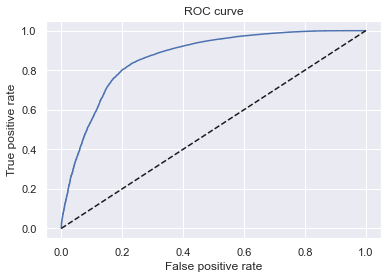

In [81]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [82]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8650959161785695

In [83]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.730191832357139

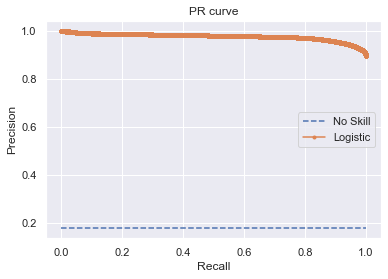

In [84]:
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [85]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.9759150436125871

In [86]:
summary_table

,Feature name,Coefficients
0,Intercept,2.962754
1,grade:A,1.065930
2,grade:B,0.857928
3,grade:C,0.652143
4,grade:D,0.516154
...,...,...
80,mths_since_issue_d:100-122,-0.287784
81,mths_since_last_credit_pull_d:missing,0.458947
82,mths_since_last_credit_pull_d:<56,0.000000
83,mths_since_last_credit_pull_d:56-61,0.000000


In [87]:
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list. We name it 'Feature name'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,mths_since_last_credit_pull_d:>75,0
1,mths_since_issue_d:>122,0
2,mths_since_earliest_cr_line:>434,0
3,"total_rev_hi_lim:>79,780",0
4,"total_rec_int:>7,260",0
5,"total_pymnt:>25,000",0
6,"out_prncp:>15,437",0
7,revol_util:>1.0,0
8,inq_last_6mths:>4,0
9,dti:>35.191,0


In [88]:
# Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,2.962754
1,1,grade:A,1.065930
2,2,grade:B,0.857928
3,3,grade:C,0.652143
4,4,grade:D,0.516154
...,...,...,...
97,12,term:60,0.000000
98,13,purpose:major_purch__car__home_impr,0.000000
99,14,verification_status:Not Verified,0.000000
100,15,home_ownership:MORTGAGE,0.000000


In [89]:
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,2.962754,Intercept
1,1,grade:A,1.065930,grade
2,2,grade:B,0.857928,grade
3,3,grade:C,0.652143,grade
4,4,grade:D,0.516154,grade
...,...,...,...,...
97,12,term:60,0.000000,term
98,13,purpose:major_purch__car__home_impr,0.000000,purpose
99,14,verification_status:Not Verified,0.000000,verification_status
100,15,home_ownership:MORTGAGE,0.000000,home_ownership


In [90]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850

In [91]:
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.962754,Intercept,607.227638,607.0
1,1,grade:A,1.065930,grade,27.551134,28.0
2,2,grade:B,0.857928,grade,22.174903,22.0
3,3,grade:C,0.652143,grade,16.855959,17.0
4,4,grade:D,0.516154,grade,13.341055,13.0
...,...,...,...,...,...,...
97,12,term:60,0.000000,term,0.000000,0.0
98,13,purpose:major_purch__car__home_impr,0.000000,purpose,0.000000,0.0
99,14,verification_status:Not Verified,0.000000,verification_status,0.000000,0.0
100,15,home_ownership:MORTGAGE,0.000000,home_ownership,0.000000,0.0


In [92]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

300.0
849.0


In [93]:
# so both our min and max scores are out by +1. we need to manually adjust this
# Which one? We'll evaluate based on the rounding differences of the minimum category within each Original Feature Name.
pd.options.display.max_rows = 102
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,2.962754,Intercept,607.227638,607.0,-0.227638
1,1,grade:A,1.065930,grade,27.551134,28.0,0.448866
2,2,grade:B,0.857928,grade,22.174903,22.0,-0.174903
3,3,grade:C,0.652143,grade,16.855959,17.0,0.144041
4,4,grade:D,0.516154,grade,13.341055,13.0,-0.341055
5,5,grade:E,0.346098,grade,8.945607,9.0,0.054393
6,6,grade:F,0.194367,grade,5.023809,5.0,-0.023809
7,7,home_ownership:OWN,-0.045988,home_ownership,-1.188662,-1.0,0.188662
8,8,home_ownership:OTHER_NONE_RENT,-0.107203,home_ownership,-2.770888,-3.0,-0.229112
9,9,verification_status:Source Verified,-0.279100,verification_status,-7.213916,-7.0,0.213916


In [94]:
# look like we can get by deducting 1 from the Intercept
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 598
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.962754,Intercept,607.227638,607.0,-0.227638,598.0
1,1,grade:A,1.065930,grade,27.551134,28.0,0.448866,28.0
2,2,grade:B,0.857928,grade,22.174903,22.0,-0.174903,22.0
3,3,grade:C,0.652143,grade,16.855959,17.0,0.144041,17.0
4,4,grade:D,0.516154,grade,13.341055,13.0,-0.341055,13.0
5,5,grade:E,0.346098,grade,8.945607,9.0,0.054393,9.0
6,6,grade:F,0.194367,grade,5.023809,5.0,-0.023809,5.0
7,7,home_ownership:OWN,-0.045988,home_ownership,-1.188662,-1.0,0.188662,-1.0
8,8,home_ownership:OTHER_NONE_RENT,-0.107203,home_ownership,-2.770888,-3.0,-0.229112,-3.0
9,9,verification_status:Source Verified,-0.279100,verification_status,-7.213916,-7.0,0.213916,-7.0


In [95]:
# Recheck min and max possible scores
print(df_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(df_scorecard.groupby('Original feature name')['Score - Final'].max().sum())

291.0
840.0


In [96]:
# first create a transformed test set through our WoE_Binning custom class
X_test_woe_transformed = woe_transform.fit_transform(X_test)
# insert an Intercept column in its beginning to align with the # of rows in scorecard
X_test_woe_transformed.insert(0, 'Intercept', 1)
X_test_woe_transformed.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:OTHER_NONE_RENT,verification_status:Source Verified,verification_status:Verified,purpose:debt_consolidation,purpose:credit_card,purpose:educ__ren_en__sm_b__mov,purpose:vacation__house__wedding__med__oth,term:36,int_rate:<7.071,int_rate:7.071-10.374,int_rate:10.374-13.676,int_rate:13.676-15.74,int_rate:15.74-20.281,annual_inc:missing,"annual_inc:<28,555","annual_inc:28,555-37,440","annual_inc:37,440-61,137","annual_inc:61,137-81,872","annual_inc:81,872-102,606","annual_inc:102,606-120,379","annual_inc:120,379-150,000",dti:<=1.6,dti:1.6-5.599,dti:5.599-10.397,dti:10.397-15.196,dti:15.196-19.195,dti:19.195-24.794,dti:24.794-35.191,inq_last_6mths:missing,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-4,revol_util:missing,revol_util:<0.1,revol_util:0.1-0.2,revol_util:0.2-0.3,revol_util:0.3-0.4,revol_util:0.4-0.5,revol_util:0.5-0.6,revol_util:0.6-0.7,revol_util:0.7-0.8,revol_util:0.8-0.9,revol_util:0.9-1.0,"out_prncp:<1,286","out_prncp:1,286-6,432","out_prncp:6,432-9,005","out_prncp:9,005-10,291","out_prncp:10,291-15,437","total_pymnt:<10,000","total_pymnt:10,000-15,000","total_pymnt:15,000-20,000","total_pymnt:20,000-25,000","total_rec_int:<1,089","total_rec_int:1,089-2,541","total_rec_int:2,541-4,719","total_rec_int:4,719-7,260",total_rev_hi_lim:missing,"total_rev_hi_lim:<6,381","total_rev_hi_lim:6,381-19,144","total_rev_hi_lim:19,144-25,525","total_rev_hi_lim:25,525-35,097","total_rev_hi_lim:35,097-54,241","total_rev_hi_lim:54,241-79,780",mths_since_earliest_cr_line:missing,mths_since_earliest_cr_line:<125,mths_since_earliest_cr_line:125-167,mths_since_earliest_cr_line:167-249,mths_since_earliest_cr_line:249-331,mths_since_earliest_cr_line:331-434,mths_since_issue_d:<79,mths_since_issue_d:79-89,mths_since_issue_d:89-100,mths_since_issue_d:100-122,mths_since_last_credit_pull_d:missing,mths_since_last_credit_pull_d:<56,mths_since_last_credit_pull_d:56-61,mths_since_last_credit_pull_d:61-75
395346,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
376583,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
297790,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
47347,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
446772,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [97]:
# get the list of our final scorecard scores
scorecard_scores = df_scorecard['Score - Final']
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(93257, 85)
(102,)


In [98]:
# we can see that the test set has 17 less columns than the rows in scorecard due to the reference categories
# since the reference categories will always be scored as 0 based on the scorecard, it is safe to add these categories to the end of test set with 0 values
X_test_woe_transformed = pd.concat([X_test_woe_transformed, pd.DataFrame(dict.fromkeys(ref_categories, [0] * len(X_test_woe_transformed)), 
                                                                         index = X_test_woe_transformed.index)], axis = 1)
# Need to reshape scorecard_scores so that it is (102,1) to allow for matrix dot multiplication
scorecard_scores = scorecard_scores.values.reshape(102, 1)
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(93257, 102)
(102, 1)


In [99]:
# matrix dot multiplication of test set with scorecard scores
y_scores = X_test_woe_transformed.dot(scorecard_scores)
#y_scores.sort_values(by=0, ascending=False)
credit_score_results = y_scores.rename(columns={0: "Credit Score"})

credit_score_results

,Credit Score
395346,504.0
376583,580.0
297790,537.0
47347,549.0
446772,460.0
...,...
32147,546.0
78936,569.0
459582,505.0
454915,557.0


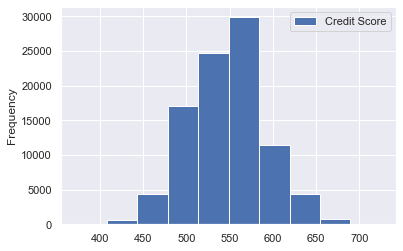

In [100]:
histogram_credit_score = credit_score_results.plot(kind="hist")

In [101]:
# save Credit Score results to csv
results_csv = credit_score_results.to_csv(r'results_credit_score.csv',index=False)


In [102]:
# save Credit Score histogram to PDF
histogram_credit_score.figure.savefig("histogram_credit_score.pdf")
